BTL Math modeling

solving minimum cost flow problem with successive path algorithm SSP

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# parameter for plot
plot_size = 20
plot_width = 8
plot_height = 5

params = {
    'legend.fontsize': 'large',
    'figure.figsize': (plot_width, plot_height),
    'axes.labelsize': plot_size,
    'axes.titlesize': plot_size,
    'xtick.labelsize': plot_size*0.75,
    'ytick.labelsize': plot_size*0.75,
    'axes.titlepad': 25,
}

plt.rcParams.update(params)

*** SET UP 8 NODES problem with arc capacity

In [59]:
G = nx.DiGraph() # create a graph
 # demand node have negative demand 
G.add_node(1,demand = -300, color='yellow')
G.add_node(2,demand = -300, color='yellow')
G.add_node(3,demand = -100, color='yellow')

# transhipment node
G.add_node(4,demand = 0, color='blue')
G.add_node(5,demand = 0, color='blue')

# supply node have positive demand
G.add_node(6,demand = 200, color='green')
G.add_node(7,demand = 200, color='green')
G.add_node(8,demand = 300, color='green')

G.add_edge(1,4,weight = 2,capacity = 99999)
G.add_edge(1,5,weight = 1,capacity = 99999)
G.add_edge(2,4,weight = 1,capacity = 99999)
G.add_edge(2,5,weight = 2,capacity = 99999)
G.add_edge(3,5,weight = 2,capacity = 99999)
G.add_edge(4,6,weight = 1,capacity = 99999)
G.add_edge(4,7,weight = 2,capacity = 99999)
G.add_edge(4,8,weight = 1,capacity = 99999)
G.add_edge(5,6,weight = 2,capacity = 99999)
G.add_edge(5,7,weight = 1,capacity = 99999)
G.add_edge(5,8,weight = 2,capacity = 99999)


Plot the net work 


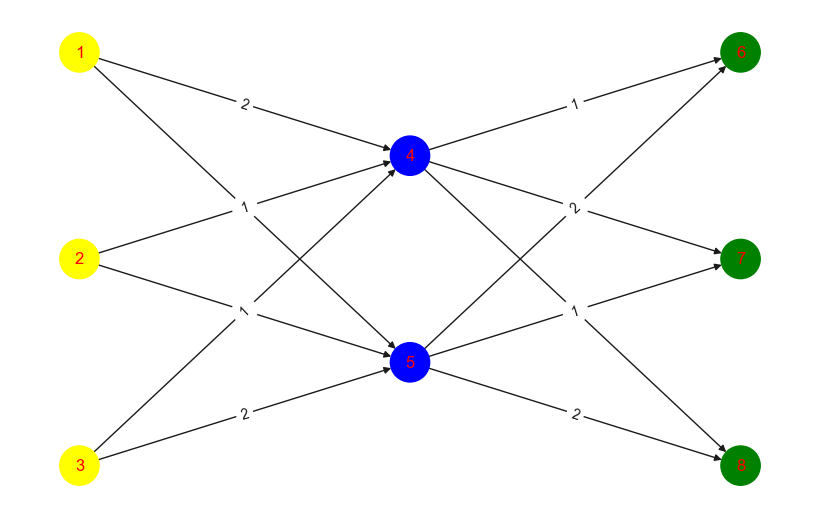

In [60]:
node_pos = {1:(1,3),2:(1,2),3:(1,1),4:(2,2.5),5:(2,1.5),6:(3,3),7:(3,2),8:(3,1)}
node_colors = list(nx.get_node_attributes(G,'color').values())
nx.draw(G,pos = node_pos, with_labels = True, font_color = 'red',node_size = 800,node_color= node_colors)
label1 = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,node_pos,label1)
plt.show()

SOLVE PROBLEM 

In [61]:
flowCost, flowDict = nx.capacity_scaling(G,demand = 'demand', weight = 'weight')

In [62]:
flowCost

1500

Display the optimal arc flows

In [63]:
flowDict

{1: {4: 4, 5: 296},
 2: {4: 300, 5: 0},
 3: {4: 100, 5: 0},
 4: {6: 200, 7: 0, 8: 204},
 5: {6: 0, 7: 200, 8: 96},
 6: {},
 7: {},
 8: {}}

solve the problem using network simplex problem - solutions

In [72]:
flowCost2, flowDict2 = nx.network_simplex(G,demand = 'demand',capacity='capacity', weight = 'weight')

In [73]:
flowCost2 # minimum cost for the simplex problem
# total objective function

1500

In [74]:
flowDict2 # optimal solution

{1: {4: 100, 5: 200},
 2: {4: 300, 5: 0},
 3: {4: 100, 5: 0},
 4: {6: 200, 7: 0, 8: 300},
 5: {6: 0, 7: 200, 8: 0},
 6: {},
 7: {},
 8: {}}